In [1]:
import pandas as pd
import numpy as np

In [2]:
f = pd.read_csv('children_per_woman_total_fertility.csv')

In [3]:
f

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Samoa,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,...,2.10,2.09,2.08,2.07,2.06,2.05,2.04,2.03,2.02,2.02
198,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,1.68,1.68,1.69,1.69,1.69,1.69,1.70,1.70,1.70,1.70
199,South Africa,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80
200,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,2.59,2.57,2.56,2.54,2.53,2.51,2.50,2.48,2.46,2.46


In [4]:
# melt - Define one or more columns to be left as is as identifiers (id_vars)
# Drag all the other columns into the row axis. 
# 2 non identifier columns are added. 1) Variable - indicates a variable for which value is added into 2) Value column. 

In [5]:
f = f.melt(id_vars=['country'], var_name = 'year', value_name = 'fertility')
f

,country,year,fertility
0,Aruba,1799,5.64
1,Afghanistan,1799,7.00
2,Angola,1799,6.93
3,Albania,1799,4.60
4,Netherlands Antilles,1799,5.80
...,...,...,...
60797,Samoa,2099,2.02
60798,Yemen,2099,1.70
60799,South Africa,2099,1.80
60800,Zambia,2099,2.46


In [6]:
f.dtypes # year data is string data, change it

country       object
year          object
fertility    float64
dtype: object

In [7]:
f.year = f.year.astype('int')

In [8]:
f.dtypes

country       object
year           int32
fertility    float64
dtype: object

In [9]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is EA74-D187

 Directory of D:\Important Docs\Knowledge Hut\Machine Learning\Prism\Advanced Data Analytics

30-10-2022  23:32    <DIR>          .
30-10-2022  12:32    <DIR>          ..
30-10-2022  23:18    <DIR>          .ipynb_checkpoints
30-10-2022  23:20           347,027 Advanced Data Analytics.ipynb
30-10-2022  23:32           121,266 Advanced Data Analytics-2(Locators and indexing).ipynb
26-10-2022  21:21           256,139 child_mortality_0_5_year_olds_dying_per_1000_born.csv
26-10-2022  21:21           298,207 children_per_woman_total_fertility.csv
26-10-2022  21:21           273,513 life_expectancy_years.csv
26-10-2022  21:21           335,548 population_total.csv
               6 File(s)      1,631,700 bytes
               3 Dir(s)  165,220,978,688 bytes free


In [10]:
gap_vars = 'children_per_woman_total_fertility child_mortality_0_5_year_olds_dying_per_1000_born population_total life_expectancy_years'.split()
dfs = []
for gap_var in gap_vars:
    df = pd.read_csv(f'{gap_var}.csv')
    df = df.melt(id_vars = ['country'], var_name = 'year', value_name = gap_var)
    df.year = df.year.astype('int')
    dfs.append(df)

In [11]:
dfs

[                    country  year  children_per_woman_total_fertility
 0                     Aruba  1799                                5.64
 1               Afghanistan  1799                                7.00
 2                    Angola  1799                                6.93
 3                   Albania  1799                                4.60
 4      Netherlands Antilles  1799                                5.80
 ...                     ...   ...                                 ...
 60797                 Samoa  2099                                2.02
 60798                 Yemen  2099                                1.70
 60799          South Africa  2099                                1.80
 60800                Zambia  2099                                2.46
 60801              Zimbabwe  2099                                1.83
 
 [60802 rows x 3 columns],
                     country  year  \
 0               Afghanistan  1799   
 1                    Angola  1799   
 2   

In [12]:
from IPython.display import display
display(*dfs)

,country,year,children_per_woman_total_fertility
0,Aruba,1799,5.64
1,Afghanistan,1799,7.00
2,Angola,1799,6.93
3,Albania,1799,4.60
4,Netherlands Antilles,1799,5.80
...,...,...,...
60797,Samoa,2099,2.02
60798,Yemen,2099,1.70
60799,South Africa,2099,1.80
60800,Zambia,2099,2.46


,country,year,child_mortality_0_5_year_olds_dying_per_1000_born
0,Afghanistan,1799,469.00
1,Angola,1799,486.00
2,Albania,1799,375.00
3,Andorra,1799,NaN
4,United Arab Emirates,1799,434.00
...,...,...,...
59292,Samoa,2099,3.51
59293,Yemen,2099,12.60
59294,South Africa,2099,9.42
59295,Zambia,2099,11.40


,country,year,population_total
0,Afghanistan,1799,3.28M
1,Angola,1799,1.57M
2,Albania,1799,400k
3,Andorra,1799,2650
4,United Arab Emirates,1799,40.2k
...,...,...,...
59292,Samoa,2099,310k
59293,Yemen,2099,53.2M
59294,South Africa,2099,79.2M
59295,Zambia,2099,81.5M


,country,year,life_expectancy_years
0,Afghanistan,1799,28.2
1,Angola,1799,27.0
2,Albania,1799,35.4
3,Andorra,1799,NaN
4,United Arab Emirates,1799,30.7
...,...,...,...
58690,Samoa,2099,80.8
58691,Yemen,2099,78.0
58692,South Africa,2099,77.7
58693,Zambia,2099,77.1


In [13]:
dfs[0].isna().sum()

country                                0
year                                   0
children_per_woman_total_fertility    87
dtype: int64

In [14]:
for var, df in zip(gap_vars, dfs):
    print(var, len(df), df.isna().sum().sum(), sep = '\t')

children_per_woman_total_fertility	60802	87
child_mortality_0_5_year_olds_dying_per_1000_born	59297	1800
population_total	59297	0
life_expectancy_years	58695	2079


# combining data frames

In [15]:
# 1. Concat (column wise, row wise)
# 2. Join
# 3. merge

In [16]:
x1 = pd.DataFrame({'alpha':list('abcde'), 'num':np.arange(5), 'x':np.arange(0,500,100)})

In [17]:
x1

,alpha,num,x
0,a,0,0
1,b,1,100
2,c,2,200
3,d,3,300
4,e,4,400


In [18]:
x2 = pd.DataFrame({'alpha':list('defgh'), 'num':np.arange(3,8), 'x':np.arange(0,100,20)})

In [19]:
x2

,alpha,num,x
0,d,3,0
1,e,4,20
2,f,5,40
3,g,6,60
4,h,7,80


In [20]:
y = pd.DataFrame({'alpha':list('abcde'), 'num':np.arange(5), 'y':np.arange(0,50,10)})

In [21]:
y

,alpha,num,y
0,a,0,0
1,b,1,10
2,c,2,20
3,d,3,30
4,e,4,40


In [22]:
# row wise concat
# cols needs to be the same, common rows would get duplicated. 
pd.concat([x1,x2])

,alpha,num,x
0,a,0,0
1,b,1,100
2,c,2,200
3,d,3,300
4,e,4,400
0,d,3,0
1,e,4,20
2,f,5,40
3,g,6,60
4,h,7,80


In [23]:
# col wise concat
# we need rows and indexes to match, if not joining needs to be done. Final df will be wider
pd.concat([x1,y], axis=1)


,alpha,num,x,alpha,num,y
0,a,0,0,a,0,0
1,b,1,100,b,1,10
2,c,2,200,c,2,20
3,d,3,300,d,3,30
4,e,4,400,e,4,40


In [24]:
# problem : repeated cols
# sols : set common cols as indexes before concat
common = ['alpha', 'num']
x1.set_index(common, inplace=True)
x2.set_index(common, inplace=True)
x1

,,x
alpha,num,
a,0,0
b,1,100
c,2,200
d,3,300
e,4,400


In [25]:
y.set_index(common, inplace=True)

In [26]:
y

,,y
alpha,num,
a,0,0
b,1,10
c,2,20
d,3,30
e,4,40


In [27]:
pd.concat([x1,y], axis=1)

,,x,y
alpha,num,,
a,0,0,0
b,1,100,10
c,2,200,20
d,3,300,30
e,4,400,40


In [28]:
# Join
# concept of combining rows from two or more tables, based on related columns between them
# most generic of combining tabular data. 
# computaionally intensive and should be avoided if possible

In [29]:
# join : Combine two dataframes based on common indexes
# merge : similar to join but works on common columns by default
# Join and merge can be made same by using two key words arguments (left_index, right_index args give same effect as join())


In [30]:
x1.join(y)

,,x,y
alpha,num,,
a,0,0,0
b,1,100,10
c,2,200,20
d,3,300,30
e,4,400,40


In [31]:
x1.merge(y, left_index=True, right_index= True)

,,x,y
alpha,num,,
a,0,0,0
b,1,100,10
c,2,200,20
d,3,300,30
e,4,400,40


In [32]:
x1.reset_index().merge(y.reset_index())

,alpha,num,x,y
0,a,0,0,0
1,b,1,100,10
2,c,2,200,20
3,d,3,300,30
4,e,4,400,40


In [33]:
x2.join(y, how='outer')

,,x,y
alpha,num,,
a,0,NaN,0.0
b,1,NaN,10.0
c,2,NaN,20.0
d,3,0.0,30.0
e,4,20.0,40.0
f,5,40.0,NaN
g,6,60.0,NaN
h,7,80.0,NaN


In [34]:
# conclusions on gapminder datasets
# 1. Sizes do not match
# 2. NaN's would result
# 3. Decisions: left, right, outer?


In [35]:
common = ['country', 'year']
for df in dfs:
    df.set_index(common, inplace=True)

In [36]:
from functools import reduce
#The reduce(fun,seq) function is used to apply a particular function passed in its 
# argument to all of the list elements mentioned in the sequence passed along.This function is defined in “functools” module.
g = gapminder = reduce(lambda x,y: x.join(y), dfs)
gapminder

,,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,population_total,life_expectancy_years
country,year,,,,
Aruba,1799,5.64,NaN,NaN,NaN
Afghanistan,1799,7.00,469.00,3.28M,28.2
Angola,1799,6.93,486.00,1.57M,27.0
Albania,1799,4.60,375.00,400k,35.4
Netherlands Antilles,1799,5.80,NaN,NaN,NaN
...,...,...,...,...,...
Samoa,2099,2.02,3.51,310k,80.8
Yemen,2099,1.70,12.60,53.2M,78.0
South Africa,2099,1.80,9.42,79.2M,77.7


In [37]:
gapminder.rename(columns = {'children_per_woman_total_fertility':'fertility', 'child_mortality_0_5_year_olds_dying_per_1000_born':'infant_mortality', 'population_total':'population', 'life_expectancy_years':'life_expectancy' })

,,fertility,infant_mortality,population,life_expectancy
country,year,,,,
Aruba,1799,5.64,NaN,NaN,NaN
Afghanistan,1799,7.00,469.00,3.28M,28.2
Angola,1799,6.93,486.00,1.57M,27.0
Albania,1799,4.60,375.00,400k,35.4
Netherlands Antilles,1799,5.80,NaN,NaN,NaN
...,...,...,...,...,...
Samoa,2099,2.02,3.51,310k,80.8
Yemen,2099,1.70,12.60,53.2M,78.0
South Africa,2099,1.80,9.42,79.2M,77.7


In [38]:
gcat = pd.concat(dfs, axis =1)
gcat

children_per_woman_total_fertility  \
country     year                                       
Afghanistan 1799                                7.00   
            1800                                7.00   
            1801                                7.00   
            1802                                7.00   
            1803                                7.00   
...                                              ...   
Zimbabwe    2095                                1.84   
            2096                                1.83   
            2097                                1.83   
            2098                                1.83   
            2099                                1.83   

                  child_mortality_0_5_year_olds_dying_per_1000_born  \
country     year                                                      
Afghanistan 1799                                              469.0   
            1800                                              469.0   
            1801                                              469.0   
            1802                                              469.0   
            1803                                              469.0   
...                                                             ...   
Zimbabwe    2095                                               14.1   
            2096                                               13.9   
            2097                                               13.8   
            2098                                               13.7   
            2099                                               13.7   

                 population_total  life_expectancy_years  
country     year                                          
Afghanistan 1799            3.28M                   28.2  
            1800            3.28M                   28.2  
            1801            3.28M                   28.2  
            1802            3.28M                   28.2  
            1803            3.28M                   28.2  
...                           ...                    ...  
Zimbabwe    2095            30.9M                   73.9  
            2096              31M                   74.0  
            2097              31M                   74.2  
            2098              31M                   74.3  
            2099              31M                   74.4  

[64113 rows x 4 columns]

In [39]:
gcat.rename(columns = {'children_per_woman_total_fertility':'fertility', 'child_mortality_0_5_year_olds_dying_per_1000_born':'infant_mortality', 'population_total':'population', 'life_expectancy_years':'life_expectancy' })

fertility  infant_mortality population  life_expectancy
country     year                                                         
Afghanistan 1799       7.00             469.0      3.28M             28.2
            1800       7.00             469.0      3.28M             28.2
            1801       7.00             469.0      3.28M             28.2
            1802       7.00             469.0      3.28M             28.2
            1803       7.00             469.0      3.28M             28.2
...                     ...               ...        ...              ...
Zimbabwe    2095       1.84              14.1      30.9M             73.9
            2096       1.83              13.9        31M             74.0
            2097       1.83              13.8        31M             74.2
            2098       1.83              13.7        31M             74.3
            2099       1.83              13.7        31M             74.4

[64113 rows x 4 columns]

In [40]:
g.isna().sum()

children_per_woman_total_fertility                     87
child_mortality_0_5_year_olds_dying_per_1000_born    4966
population_total                                     4816
life_expectancy_years                                4816
dtype: int64

# PIVOT TABLES

In [41]:
# Can be considered reverse of melt but not exactly. 
# is a way to reshape and summarize data to extract meaningful information
# usually needs aggregation methods like sum, min/max, mean. 
# two methods are available pivot() and pivot_table()

In [42]:
g.rename(columns = {'children_per_woman_total_fertility':'fertility', 'child_mortality_0_5_year_olds_dying_per_1000_born':'infant_mortality', 'population_total':'population', 'life_expectancy_years':'life_expectancy' }, inplace = True)

In [43]:
g.reset_index(inplace=True)

In [44]:
g


,country,year,fertility,infant_mortality,population,life_expectancy
0,Aruba,1799,5.64,NaN,NaN,NaN
1,Afghanistan,1799,7.00,469.00,3.28M,28.2
2,Angola,1799,6.93,486.00,1.57M,27.0
3,Albania,1799,4.60,375.00,400k,35.4
4,Netherlands Antilles,1799,5.80,NaN,NaN,NaN
...,...,...,...,...,...,...
60797,Samoa,2099,2.02,3.51,310k,80.8
60798,Yemen,2099,1.70,12.60,53.2M,78.0
60799,South Africa,2099,1.80,9.42,79.2M,77.7
60800,Zambia,2099,2.46,11.40,81.5M,77.1


In [45]:
g.pivot(index = 'country', columns = 'year', values = ['fertility', 'infant_mortality', 'population', 'life_expectancy'])

fertility                                            \
year                       1799  1800  1801  1802  1803  1804  1805  1806   
country                                                                     
Afghanistan                 7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   
Albania                     4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   
Algeria                    6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99   
Angola                     6.93  6.93  6.93  6.93  6.93  6.93  6.93  6.94   
Antigua and Barbuda         5.0   5.0  4.99  4.99  4.99  4.98  4.98  4.97   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
Virgin Islands (U.S.)      5.55  5.55  5.55  5.55  5.55  5.55  5.55  5.55   
Western Sahara             6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32   
Yemen                      6.88  6.88  6.88  6.88  6.88  6.88  6.88  6.88   
Zambia                     6.71  6.71  6.71  6.71  6.71  6.71  6.71  6.71   
Zimbabwe                   6.75  6.75  6.75  6.75  6.75  6.75  6.75  6.75   

                                   ... life_expectancy                    \
year                   1807  1808  ...            2090  2091  2092  2093   
country                            ...                                     
Afghanistan             7.0   7.0  ...            75.5  75.7  75.8  76.0   
Albania                 4.6   4.6  ...            87.4  87.5  87.6  87.7   
Algeria                6.99  6.99  ...            86.1  86.2  86.3  86.4   
Angola                 6.94  6.94  ...            78.8  79.0  79.1  79.2   
Antigua and Barbuda    4.97  4.97  ...            85.0  85.1  85.2  85.3   
...                     ...   ...  ...             ...   ...   ...   ...   
Virgin Islands (U.S.)  5.55  5.55  ...             NaN   NaN   NaN   NaN   
Western Sahara         6.32  6.32  ...             NaN   NaN   NaN   NaN   
Yemen                  6.88  6.88  ...            76.9  77.0  77.1  77.3   
Zambia                 6.71  6.71  ...            75.8  76.0  76.1  76.3   
Zimbabwe               6.75  6.75  ...            73.3  73.4  73.5  73.7   

                                                           
year                   2094  2095  2096  2097  2098  2099  
country                                                    
Afghanistan            76.1  76.2  76.4  76.5  76.6  76.8  
Albania                87.8  87.9  88.0  88.2  88.3  88.4  
Algeria                86.5  86.6  86.7  86.8  86.9  87.0  
Angola                 79.3  79.5  79.6  79.7  79.9  80.0  
Antigua and Barbuda    85.4  85.5  85.6  85.7  85.8  85.9  
...                     ...   ...   ...   ...   ...   ...  
Virgin Islands (U.S.)   NaN   NaN   NaN   NaN   NaN   NaN  
Western Sahara          NaN   NaN   NaN   NaN   NaN   NaN  
Yemen                  77.4  77.5  77.6  77.8  77.9  78.0  
Zambia                 76.4  76.5  76.7  76.8  77.0  77.1  
Zimbabwe               73.8  73.9  74.0  74.2  74.3  74.4  

[202 rows x 1204 columns]

In [46]:
g.dtypes

country              object
year                  int64
fertility           float64
infant_mortality    float64
population           object
life_expectancy     float64
dtype: object

In [47]:
usa_can = 'United States,Canada'.split(',')
usa_can

['United States', 'Canada']

In [48]:
south_east_asia = 'Brunei,Cambodia,Indonesia,Lao,Malaysia,Myanmar,Philippines,Singapore,Thailand,Timor-Leste,Vietnam'.split(',')
south_east_asia

['Brunei',
 'Cambodia',
 'Indonesia',
 'Lao',
 'Malaysia',
 'Myanmar',
 'Philippines',
 'Singapore',
 'Thailand',
 'Timor-Leste',
 'Vietnam']

In [49]:
south_asia = 'Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka'.split(',')
south_asia

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'India',
 'Maldives',
 'Nepal',
 'Pakistan',
 'Sri Lanka']

In [50]:
gap_usa_can = g[g.country.isin(usa_can)]
gap_usa_can


,country,year,fertility,infant_mortality,population,life_expectancy
30,Canada,1799,5.72,333.00,500k,39.0
190,United States,1799,7.03,329.00,6M,39.4
232,Canada,1800,5.72,333.00,512k,39.0
392,United States,1800,7.01,329.00,6.11M,39.4
434,Canada,1801,5.72,333.00,525k,39.0
...,...,...,...,...,...,...
60386,United States,2097,1.92,1.72,432M,88.7
60428,Canada,2098,1.79,0.85,56.7M,91.5
60588,United States,2098,1.92,1.70,433M,88.8
60630,Canada,2099,1.79,0.85,57M,91.6


<AxesSubplot:xlabel='year'>

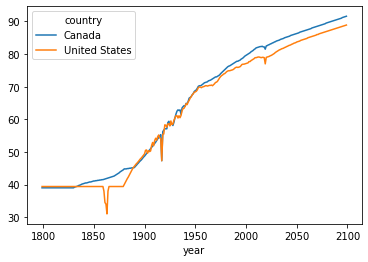

In [51]:
gap_usa_can.pivot(index='year', columns = 'country', values='life_expectancy').plot()

<AxesSubplot:xlabel='year'>

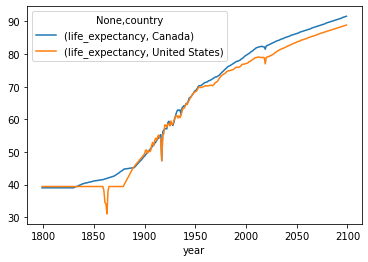

In [52]:
gap_usa_can.pivot(index='year', columns = 'country', values=['population', 'life_expectancy']).plot()

In [53]:
gap_sea_21 = g[g['country'].isin(south_east_asia) & g['year'].between(2000,2020)]

In [54]:
gap_sea_21

,country,year,fertility,infant_mortality,population,life_expectancy
40628,Brunei,2000,2.12,10.10,340k,72.8
40685,Indonesia,2000,2.51,50.00,214M,67.5
40699,Cambodia,2000,3.65,97.10,12.4M,60.9
40703,Lao,2000,4.14,103.00,5.41M,59.0
40722,Myanmar,2000,2.89,86.70,47.2M,59.4
...,...,...,...,...,...,...
44785,Philippines,2020,2.78,26.60,111M,72.1
44802,Singapore,2020,1.28,2.54,5.9M,85.1
44819,Thailand,2020,1.42,8.25,70M,78.8
44822,Timor-Leste,2020,4.96,41.30,1.34M,71.0


In [55]:
gap_sea_21.pivot_table(index='year', values='infant_mortality', columns = 'country')

country,Brunei,Cambodia,Indonesia,Lao,Malaysia,Myanmar,Philippines,Singapore,Thailand,Timor-Leste,Vietnam
year,,,,,,,,,,,
2000,10.10,97.1,50.0,103.0,9.48,86.7,37.1,3.60,20.80,103.0,28.6
2001,9.82,87.2,47.8,98.5,8.93,84.3,36.4,3.38,19.80,97.3,27.5
2002,9.66,78.4,45.7,94.4,8.54,81.8,35.7,3.20,18.80,92.0,26.6
2003,9.54,71.2,49.7,90.4,8.30,79.3,35.0,3.06,17.90,86.8,25.8
2004,9.47,65.3,41.9,86.4,8.13,76.7,34.4,2.96,17.00,81.8,25.1
2005,9.43,60.3,40.1,82.5,8.00,74.0,33.8,2.89,16.20,76.9,24.5
2006,9.43,55.9,38.5,78.7,7.91,71.4,33.3,2.86,15.40,72.5,24.1
2007,9.47,51.8,37.0,75.0,7.89,88.9,32.8,2.84,14.70,68.5,23.7
2008,9.55,47.9,35.5,71.5,7.91,66.0,32.4,2.83,14.00,65.2,23.4


<AxesSubplot:xlabel='year'>

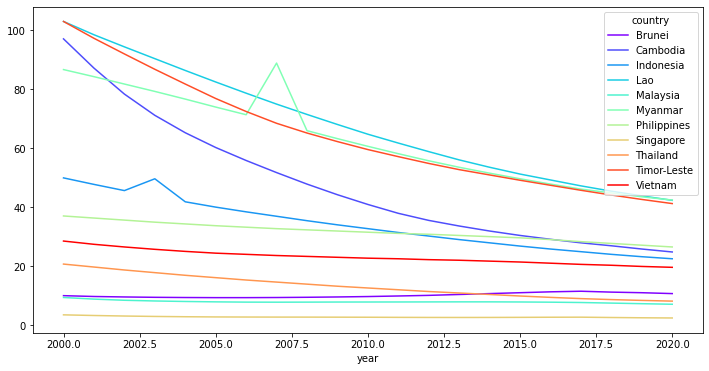

In [56]:
gap_sea_21.pivot_table(index='year', values='infant_mortality', columns = 'country').plot(figsize=(12,6), cmap='rainbow')

In [57]:
g['decade'] = g['year']//10*10
 

In [58]:
g

,country,year,fertility,infant_mortality,population,life_expectancy,decade
0,Aruba,1799,5.64,NaN,NaN,NaN,1790
1,Afghanistan,1799,7.00,469.00,3.28M,28.2,1790
2,Angola,1799,6.93,486.00,1.57M,27.0,1790
3,Albania,1799,4.60,375.00,400k,35.4,1790
4,Netherlands Antilles,1799,5.80,NaN,NaN,NaN,1790
...,...,...,...,...,...,...,...
60797,Samoa,2099,2.02,3.51,310k,80.8,2090
60798,Yemen,2099,1.70,12.60,53.2M,78.0,2090
60799,South Africa,2099,1.80,9.42,79.2M,77.7,2090
60800,Zambia,2099,2.46,11.40,81.5M,77.1,2090


In [59]:
gap_sa = g[g['country'].isin(south_asia)]
gap_sa

,country,year,fertility,infant_mortality,population,life_expectancy,decade
1,Afghanistan,1799,7.00,469.00,3.28M,28.2,1790
16,Bangladesh,1799,6.70,508.00,19.2M,25.5,1790
27,Bhutan,1799,6.67,463.00,392k,28.8,1790
84,India,1799,5.95,509.00,201M,25.4,1790
106,Sri Lanka,1799,5.68,410.00,1.75M,32.6,1790
...,...,...,...,...,...,...,...
60684,India,2099,1.78,6.13,1.45B,83.3,2090
60706,Sri Lanka,2099,1.81,2.17,15.3M,88.4,2090
60715,Maldives,2099,1.80,1.92,490k,91.3,2090
60737,Nepal,2099,1.77,7.09,23.7M,84.3,2090


In [60]:
gap_sa.pivot_table(index='decade', values='population', columns='country', aggfunc=np.mean)

c:\users\vaibh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:979: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  result = op.agg()


country
decade
1790
1800
1810
1820
1830
1840
1850
1860
1870


In [61]:
# pivot table supports agg, superset of pivot. 
# has a keyword argument aggfunc, by default its mean but can be specified
# diff agg fucntions can be given if there are different values in final pivoted data. 

In [68]:
def value_to_float(x):
    if 'k' in x:
            return float(x.replace('k', '')) * 1000
    if 'M' in x:
            return float(x.replace('M', '')) * 1000000
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000

In [63]:
gap_sa['population'] = gap_sa['population'].apply(value_to_float)

c:\users\vaibh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
gap_sa['population']

1        3.280000e+06
16       1.920000e+07
27       3.920000e+05
84       2.010000e+08
106      1.750000e+06
             ...     
60684    1.450000e+09
60706    1.530000e+07
60715    4.900000e+05
60737    2.370000e+07
60740    4.030000e+08
Name: population, Length: 2408, dtype: float64

<AxesSubplot:xlabel='decade'>

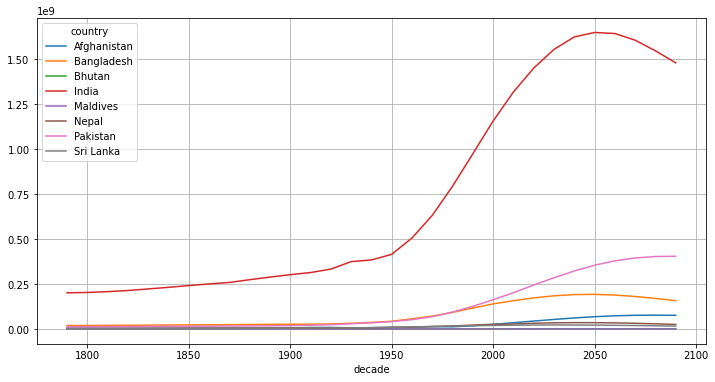

In [65]:
gap_sa.pivot_table(index='decade', values='population', columns='country', aggfunc=np.mean).plot(figsize=(12,6), grid=True)

In [66]:
gap_sa.pivot_table(index='decade', values=['population','fertility'], columns='country', aggfunc={'population':np.mean, 'fertility':np.median})

fertility                                                    \
country Afghanistan Bangladesh Bhutan  India Maldives  Nepal Pakistan   
decade                                                                  
1790          7.000      6.700  6.670  5.950    5.980  6.150    6.590   
1800          7.000      6.700  6.670  5.950    5.980  6.150    6.590   
1810          7.000      6.700  6.670  5.950    5.980  6.150    6.590   
1820          7.000      6.700  6.670  5.950    5.980  6.150    6.590   
1830          7.000      6.700  6.670  5.950    5.980  6.150    6.590   
1840          7.000      6.700  6.670  5.950    5.980  6.150    6.590   
1850          7.000      6.700  6.670  5.950    5.980  6.150    6.590   
1860          7.000      6.700  6.670  5.950    5.980  6.150    6.590   
1870          7.000      6.700  6.670  5.950    5.980  6.150    6.590   
1880          7.000      6.700  6.670  5.775    5.980  6.150    6.590   
1890          7.000      6.700  6.670  5.730    5.980  6.150    6.590   
1900          7.000      6.700  6.670  5.720    5.980  6.150    6.590   
1910          7.000      6.700  6.670  5.710    5.980  6.150    6.590   
1920          7.015      6.690  6.670  5.805    5.970  6.145    6.590   
1930          7.275      6.500  6.670  5.920    5.820  6.085    6.590   
1940          7.490      6.320  6.670  5.920    5.665  6.015    6.600   
1950          7.515      6.530  6.670  5.900    6.570  5.970    6.600   
1960          7.450      6.890  6.670  5.810    7.210  5.960    6.600   
1970          7.450      6.790  6.675  5.150    7.025  5.830    6.605   
1980          7.460      5.425  6.270  4.440    7.040  5.460    6.390   
1990          7.570      3.665  4.500  3.615    4.140  4.660    5.270   
2000          6.740      2.565  2.785  2.935    2.315  3.220    4.045   
2010          4.720      2.115  2.070  2.340    2.110  2.140    3.515   
2020          3.375      1.870  1.800  2.130    1.800  1.870    2.960   
2030          2.655      1.725  1.655  1.980    1.690  1.735    2.605   
2040          2.255      1.660  1.620  1.875    1.690  1.685    2.350   
2050          2.000      1.660  1.640  1.815    1.720  1.690    2.155   
2060          1.845      1.685  1.680  1.780    1.740  1.710    2.005   
2070          1.770      1.710  1.710  1.770    1.760  1.730    1.915   
2080          1.745      1.740  1.740  1.770    1.780  1.750    1.855   
2090          1.740      1.760  1.760  1.770    1.790  1.770    1.820   

                   population                                                 \
country Sri Lanka Afghanistan   Bangladesh    Bhutan         India  Maldives   
decade                                                                         
1790        5.680   3280000.0   19200000.0  392000.0  2.010000e+08   42400.0   
1800        5.680   3280000.0   19400000.0  392000.0  2.030000e+08   42400.0   
1810        5.680   3281000.0   19850000.0  391900.0  2.075000e+08   42410.0   
1820        5.680   3361000.0   20480000.0  381700.0  2.138000e+08   43790.0   
1830        5.680   3516000.0   21360000.0  363000.0  2.225000e+08   46440.0   
1840        5.680   3675000.0   22270000.0  345300.0  2.315000e+08   49260.0   
1850        5.680   3854000.0   22910000.0  329500.0  2.411000e+08   51880.0   
1860        5.680   4050000.0   23280000.0  314900.0  2.505000e+08   54350.0   
1870        5.680   4258000.0   23890000.0  301000.0  2.586000e+08   56910.0   
1880        5.730   4476000.0   24730000.0  287800.0  2.739000e+08   59580.0   
1890        5.445   4706000.0   25580000.0  275300.0  2.884000e+08   62380.0   
1900        5.525   5195000.0   26420000.0  263100.0  3.018000e+08   65230.0   
1910        5.760   8295000.0   27000000.0  258500.0  3.136000e+08   65240.0   
1920        6.000   8591000.0   27950000.0  259000.0  3.327000e+08   68660.0   
1930        5.530   6656000.0   31740000.0  258100.0  3.744000e+08   75810.0   
1940        5.760   7234000.0   36290000.0  207700.0  3.836000e+08   75520.0   
1950   